In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!ls

sample_data


In [0]:
%cd drive/My\ Drive/data

/content/drive/My Drive/data


In [0]:
!ls

 train_dataloader_final.csv  'TRAINING.zip (Unzipped Files)'
 TRAINING		      validate_dataloader_final.csv


In [0]:
! git clone https://github.com/thecityny/covid-19-nyc-data.git

Cloning into 'covid-19-nyc-data'...
remote: Enumerating objects: 125, done.
remote: Counting objects: 100% (125/125), done.
remote: Compressing objects: 100% (69/69), done.
remote: Total 125 (delta 84), reused 97 (delta 56), pack-reused 0
Receiving objects: 100% (125/125), 84.23 KiB | 3.51 MiB/s, done.
Resolving deltas: 100% (84/84), done.


In [0]:
import pandas as pd
import numpy as np

In [0]:
zcta_data = pd.read_csv("covid-19-nyc-data/zcta.csv")

In [0]:
zcta_data.tail()

,timestamp,zcta,positive,total
3914,2020-04-24T04:00:00Z,11691.0,1690,2746
3915,2020-04-24T04:00:00Z,11692.0,446,777
3916,2020-04-24T04:00:00Z,11693.0,271,512
3917,2020-04-24T04:00:00Z,11694.0,540,1051
3918,2020-04-24T04:00:00Z,11697.0,78,171


In [0]:
zcta_data.shape

(3919, 4)

In [0]:
!ls

 covid-19-nyc-data	     'TRAINING.zip (Unzipped Files)'
 train_dataloader_final.csv   validate_dataloader_final.csv
 TRAINING


In [0]:
zcta_pop_data = pd.read_csv("covid-19-nyc-data/zipcodewithpop.csv")

In [0]:
zcta_pop_data.head()

,Rank,Zip Code,Population
0,1,11368,"112,425"
1,2,11385,"106,717"
2,3,10467,"103,732"
3,4,11211,"102,624"
4,5,11236,"100,331"


In [0]:
zcta_pop_data[zcta_pop_data['Zip Code'] == '10002']

,Rank,Zip Code,Population
34,35,10002,"74,993"


In [0]:
# Time Sqaure and Theater Zone

In [0]:
T1 = zcta_data[zcta_data["zcta"] == 10019]

In [0]:
T1['Population'] = 43703

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
T2 = zcta_data[zcta_data["zcta"] == 10036]

In [0]:
T2['Population'] = 27428

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
Merge = np.array(T1['total']) + np.array(T2['total'])
Merge_total = np.array(T1['Population']) + np.array(T2['Population'])

In [0]:
T1['Merge_total'] = Merge
T1['Merge_population'] = Merge_total

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
T1['cases_ratio'] = T1.Merge_total / T1.Merge_population *100

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
T1.head()

,timestamp,zcta,positive,total,Population,Merge_total,Merge_population,cases_ratio,date
17,2020-03-31T04:00:00Z,10019.0,187,451,43703,726,71131,1.020652,2020-03-31
195,2020-04-03T04:00:00Z,10019.0,226,520,43703,851,71131,1.196384,2020-04-03
373,2020-04-04T04:00:00Z,10019.0,237,542,43703,888,71131,1.248401,2020-04-04
551,2020-04-05T04:00:00Z,10019.0,244,560,43703,915,71131,1.286359,2020-04-05
729,2020-04-07T04:00:00Z,10019.0,264,616,43703,1020,71131,1.433974,2020-04-07


In [0]:
T1['date'] = [x[:10] for x in T1['timestamp']]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


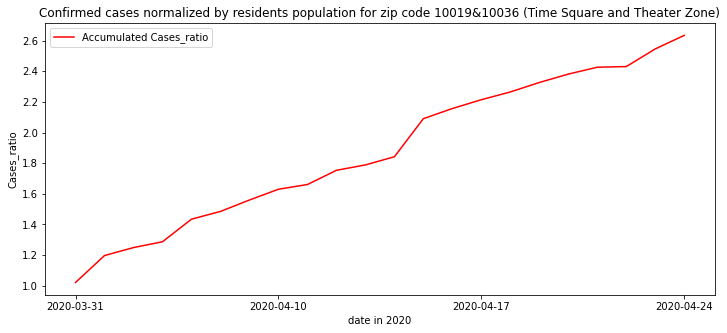

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as mticker

fig, ax = plt.subplots(figsize=(12,5))
myLocator = mticker.MultipleLocator(7)
ax.xaxis.set_major_locator(myLocator)
ax.plot(T1.date, T1.cases_ratio, color='red', label = 'Accumulated Cases_ratio')
ax.legend()
ax.set(xlabel='date in 2020', ylabel='Cases_ratio',
       title='Confirmed cases normalized by residents population for zip code 10019&10036 (Time Square and Theater Zone)')
fig.show()

In [0]:
# Lower East Side

In [0]:
T3 = zcta_data[zcta_data["zcta"] == 10002]

In [0]:
T3['Population'] = 74993

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
T3.tail()

,timestamp,zcta,positive,total,Population,cases_ratio,date
3031,2020-04-20T04:00:00Z,10002.0,716,1384,74993,0.954756,2020-04-20
3209,2020-04-21T04:00:00Z,10002.0,729,1419,74993,0.972091,2020-04-21
3387,2020-04-22T04:00:00Z,10002.0,733,1427,74993,0.977425,2020-04-22
3565,2020-04-23T04:00:00Z,10002.0,756,1498,74993,1.008094,2020-04-23
3743,2020-04-24T04:00:00Z,10002.0,774,1561,74993,1.032096,2020-04-24


In [0]:
T3['cases_ratio'] = T3.positive / T3.Population *100

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
T3['date'] = [x[:10] for x in T3['timestamp']]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


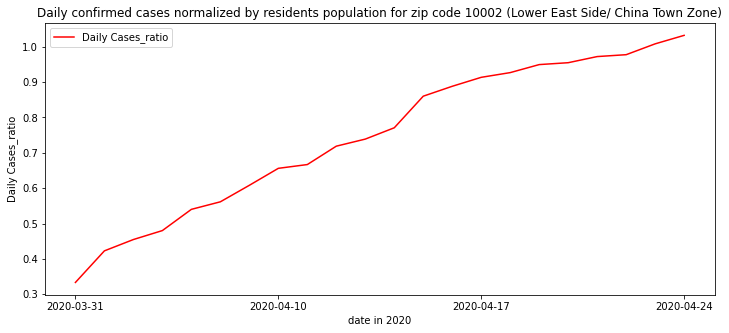

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as mticker

fig, ax = plt.subplots(figsize=(12,5))
myLocator = mticker.MultipleLocator(7)
ax.xaxis.set_major_locator(myLocator)
ax.plot(T3.date, T3.cases_ratio, color='red', label = 'Daily Cases_ratio')
ax.legend()
ax.set(xlabel='date in 2020', ylabel='Daily Cases_ratio',
       title='Daily confirmed cases normalized by residents population for zip code 10002 (Lower East Side/ China Town Zone)')
fig.show()